In [1]:
# Imports
import pandas as pd
import numpy as np
from os import listdir
import statistics
import matplotlib.pyplot as plt

print("Done.")

Done.


## Read in the .CSV file to do EDA on: 

In [2]:
# Read in the .CSV file
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    names = [ filename for filename in filenames if filename.endswith( suffix ) ]
    return names

In [28]:
# Print the names of all .csv files in the directory (change the path name to your local path):
#path = '/Users/jasminesimmons/Smartfin/Smartfin/Mini_Projects/ML_Wave_Stats2/'
#names = find_csv_filenames( path, suffix=".csv" )
#print(len(names))
#print(names)

In [27]:
data_csv = pd.read_csv('CSE258_A2_Data_Jasmine_Combined_Copy.csv')
data_csv = data_csv.drop(columns=['Unnamed: 0'])
data_csv[:10]
#data_csv[:-10]

,identifier,UTC,IMU A1,IMU A2,IMU A3,IMU G1,IMU G2,IMU G3,IMU M1,IMU M2,IMU M3,Date,Time,Hs(ft),Tp(s),Dp(deg)
0,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:33.3380+00:00,2.949656,-11.760319,-10.745177,112.317073,10.609756,32.560976,79.0,171.0,593.0,2018-05-19,16:37,3.15,7.14,288.0
1,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:33.5890+00:00,2.279280,-9.193734,-7.872135,304.634146,57.439024,11.829268,96.0,214.0,358.0,2018-05-19,16:37,3.15,7.14,288.0
2,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:33.8400+00:00,-1.647211,1.053449,-8.197746,395.365854,0.853659,-24.390244,126.0,-140.0,194.0,2018-05-19,16:37,3.15,7.14,288.0
3,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.0910+00:00,2.911349,22.677878,0.402226,352.073171,-21.951220,66.829268,111.0,-267.0,549.0,2018-05-19,16:37,3.15,7.14,288.0
4,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.3410+00:00,-2.221819,10.591948,-0.019154,-4.146341,33.292683,10.365854,116.0,-256.0,570.0,2018-05-19,16:37,3.15,7.14,288.0
5,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.5930+00:00,-1.493982,9.059659,0.517148,-11.951220,16.341463,-3.536585,96.0,-268.0,554.0,2018-05-19,16:37,3.15,7.14,288.0
6,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:34.8440+00:00,-1.225831,9.710882,0.766145,7.073171,14.512195,-3.658537,97.0,-267.0,549.0,2018-05-19,16:37,3.15,7.14,288.0
7,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:35.0960+00:00,-1.110910,9.749189,0.555455,-4.268293,9.146341,-1.829268,96.0,-260.0,560.0,2018-05-19,16:37,3.15,7.14,288.0
8,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:35.3470+00:00,-0.881066,9.327810,0.842759,-5.975610,6.707317,0.243902,92.0,-262.0,554.0,2018-05-19,16:37,3.15,7.14,288.0
9,facebook_10213517683684254_0006667E2297_180519...,2018-05-19T16:37:35.5990+00:00,-0.861913,9.442731,1.015142,4.756098,7.926829,1.341463,94.0,-262.0,560.0,2018-05-19,16:37,3.15,7.14,288.0


## Compute the standard deviation and mean of the 28 rides

In [29]:
# Compute the standard deviation and mean of the 28 rides
columns = data_csv.columns
print(columns)

Index(['identifier', 'UTC', 'IMU A1', 'IMU A2', 'IMU A3', 'IMU G1', 'IMU G2',
       'IMU G3', 'IMU M1', 'IMU M2', 'IMU M3', 'Date', 'Time', 'Hs(ft)',
       'Tp(s)', 'Dp(deg)'],
      dtype='object')


In [30]:
data_csv['IMU A1'][0]

2.9496564453125

In [31]:
# Compute the standard deviation over each minute: 
def compute_standard_deviations(input_label): 
    old_time = '16:37'
    stds_minute_intervals = []
    wave_height_minute_intervals = []
    new_std = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_std) > 2:
                std = statistics.stdev(new_std)
                stds_minute_intervals.append(std)
                wave_height_minute_intervals.append(data_csv['Hs(ft)'][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_std = []
            old_time = t
        else:
            new_std.append(data_csv[input_label][i])
    
    return stds_minute_intervals, wave_height_minute_intervals, minute_times

In [32]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_stds, a1_wave_heights, a1_minutes = compute_standard_deviations("IMU A1")
a2_stds, a2_wave_heights, a2_minutes = compute_standard_deviations("IMU A2")
a3_stds, a3_wave_heights, a3_minutes = compute_standard_deviations("IMU A3")

In [33]:
# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
g1_stds, g1_wave_heights, g1_minutes = compute_standard_deviations("IMU G1")
g2_stds, g2_wave_heights, g2_minutes = compute_standard_deviations("IMU G2")
g3_stds, g3_wave_heights, g3_minutes = compute_standard_deviations("IMU G3")

In [34]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_stds, m1_wave_heights, m1_minutes = compute_standard_deviations("IMU M1")
m2_stds, m2_wave_heights, m2_minutes = compute_standard_deviations("IMU M2")
m3_stds, m3_wave_heights, m3_minutes = compute_standard_deviations("IMU M3")

In [35]:
#print(len(stds_minute_intervals))
#print(len(wave_height_minute_intervals))
#print(stds_minute_intervals[:10])

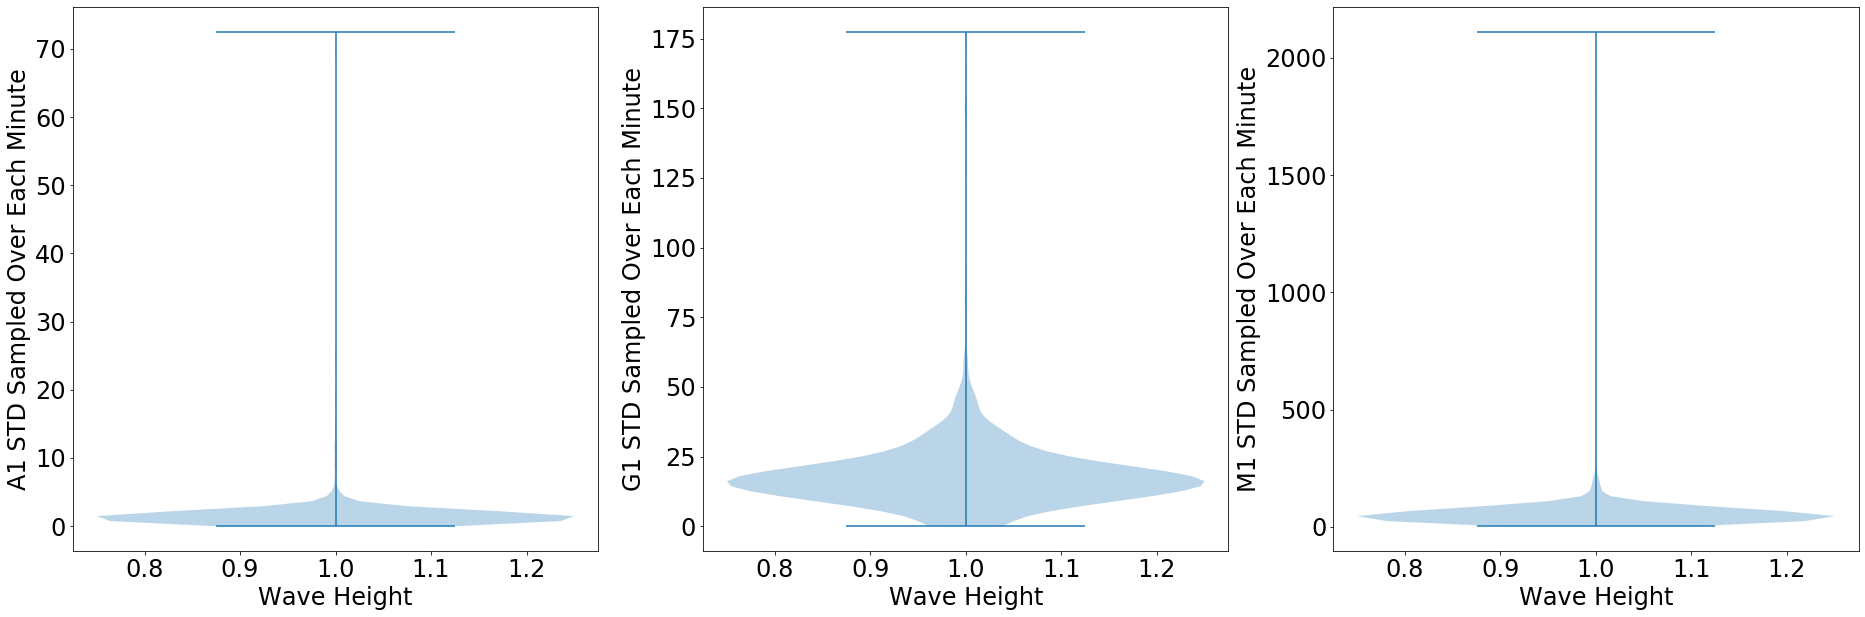

In [36]:
f = plt.figure(figsize=(32,10))
plt.rcParams.update({'font.size': 24})

ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)


ax1.violinplot(a1_stds)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")

ax2.violinplot(g1_stds)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("G1 STD Sampled Over Each Minute")

ax3.violinplot(m1_stds)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("M1 STD Sampled Over Each Minute")

plt.show()

## Inputs vs. Wave Heights (Standard deviations and means) 

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Heights:


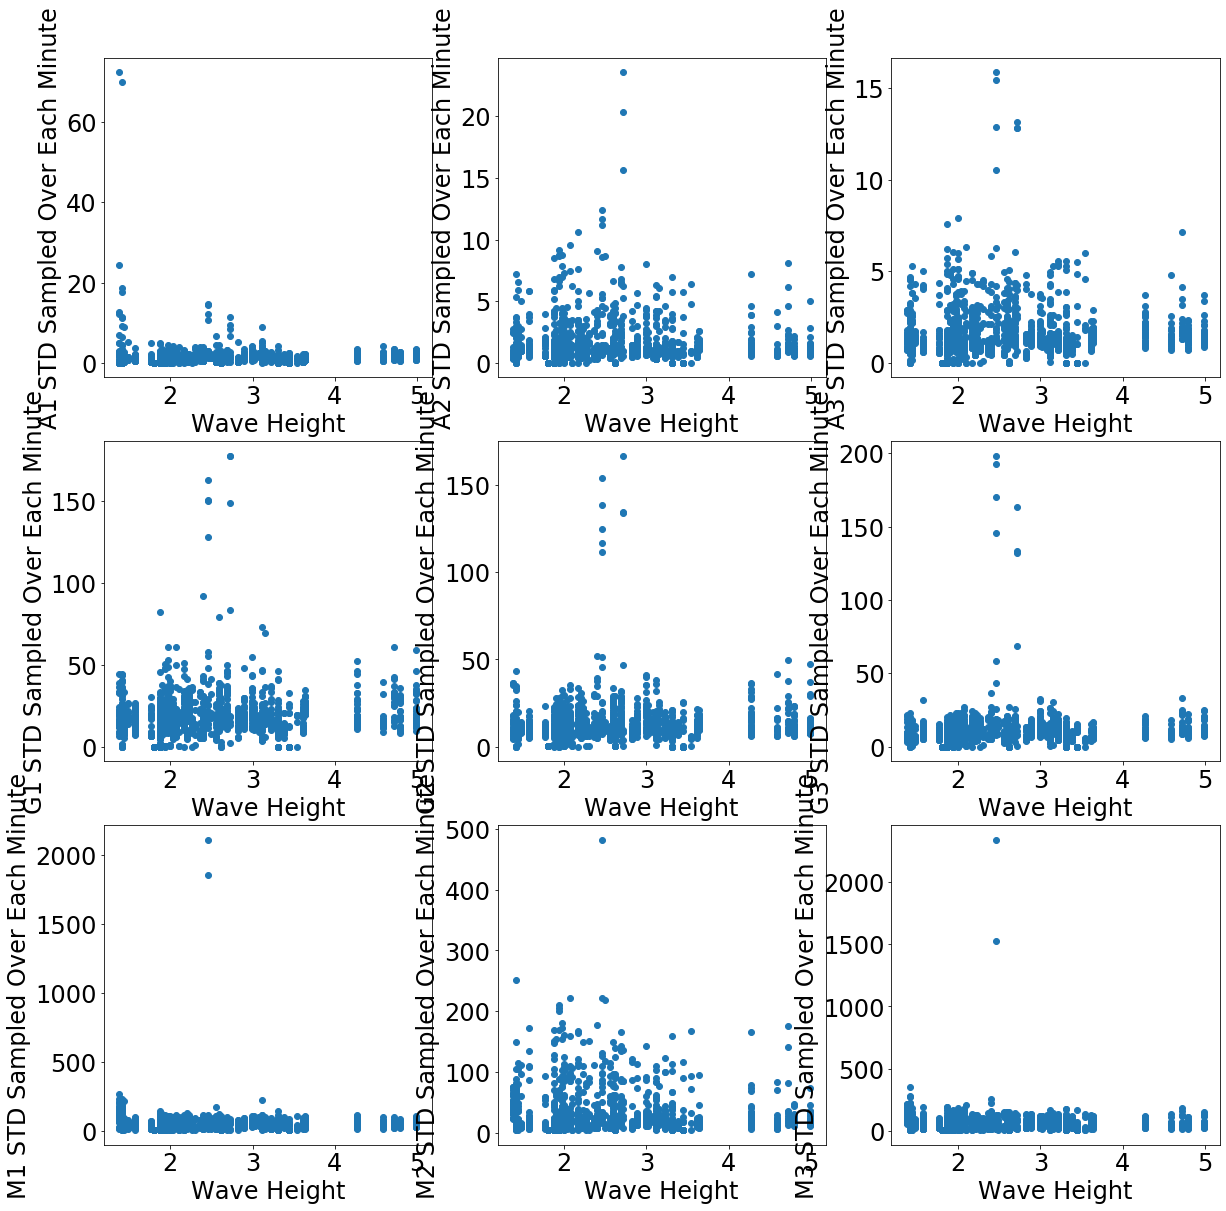

In [37]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Heights:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_wave_heights, a1_stds
x2, y2 = a2_wave_heights, a2_stds
x3, y3 = a3_wave_heights, a3_stds

x4, y4 = g1_wave_heights, g1_stds
x5, y5 = g2_wave_heights, g2_stds
x6, y6 = g3_wave_heights, g3_stds

x7, y7 = m1_wave_heights, m1_stds
x8, y8 = m2_wave_heights, m2_stds
x9, y9 = m3_wave_heights, m3_stds

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

In [38]:
# Compress the data into a single point for each wave height by computing the average std:
def update_stds(wave_heights, stds):
    d = {}
    for hs, s in zip(wave_heights, stds):
        if hs not in d: 
            d.update({hs : (s, 1)})
        else: 
            new_s = d[hs][0] + s
            new_len = d[hs][1] + 1
            d.update(hs = (new_s, new_len))
            
    # Compute the actual new mean for each value: 
    heights = []
    stds = []
    for (key, (v1, v2)) in d.items(): 
        if key != 'hs':
            heights.append(key)
            stds.append(float(v1/v2))
        
    return np.array(heights), np.array(stds)


In [39]:

# Write a function to compute the line of best fit: 
from statistics import mean

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    
    return m, b

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:


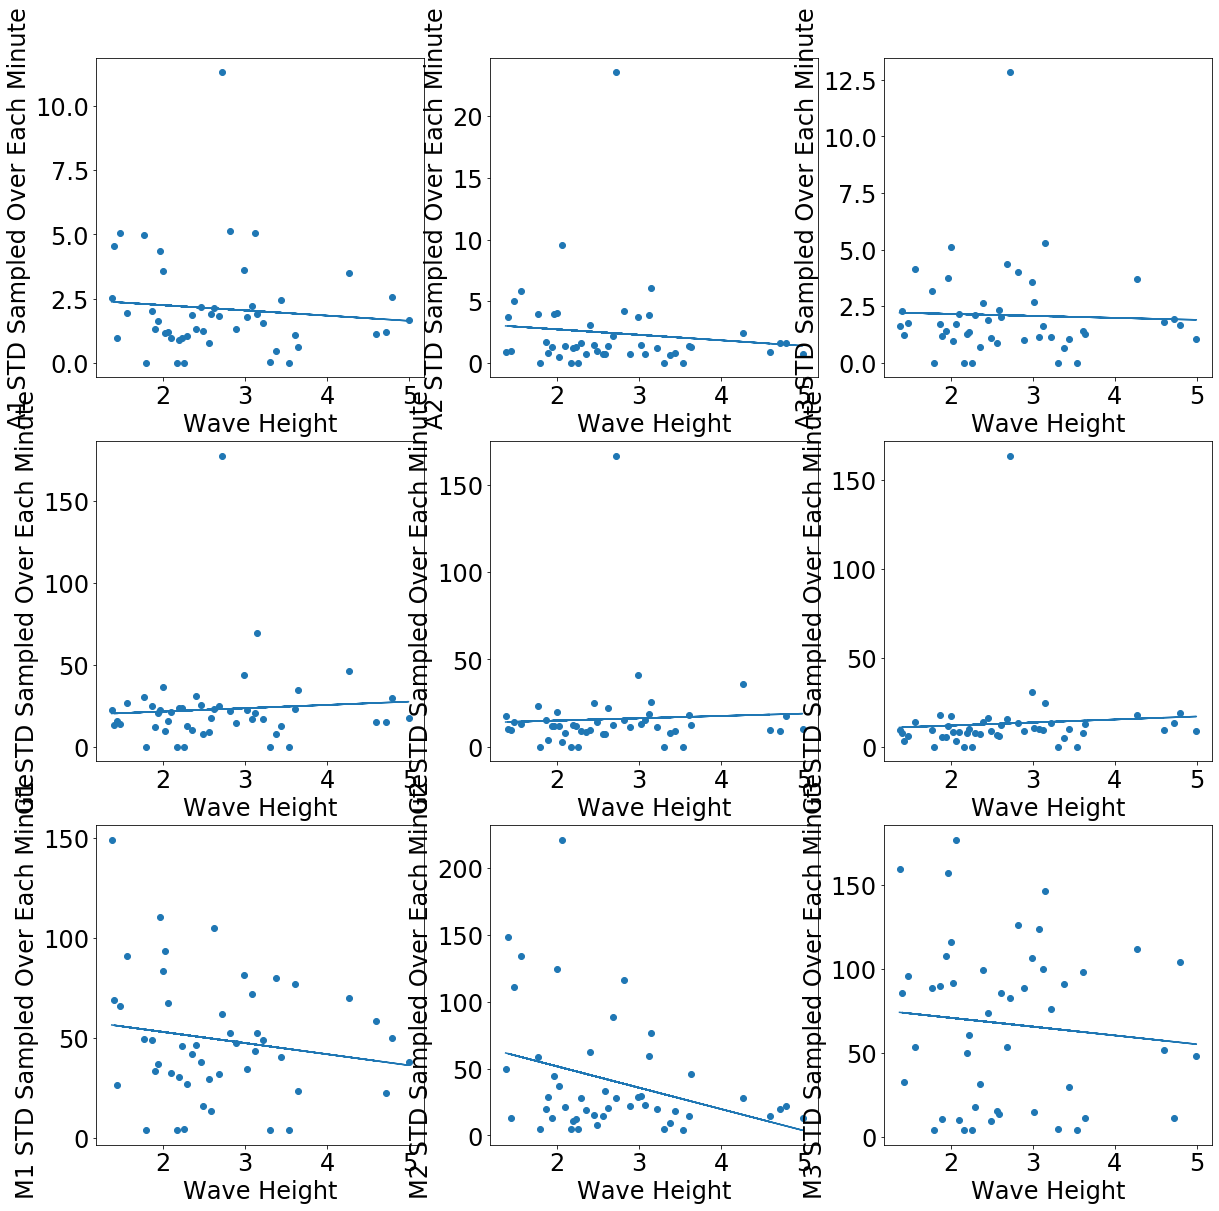

In [40]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = update_stds(a1_wave_heights, a1_stds)
m1, b1 = best_fit_slope_and_intercept(x1, y1)
regression_line1 = [(m1*x)+b1 for x in x1]


x2, y2 = update_stds(a2_wave_heights, a2_stds)
m2, b2 = best_fit_slope_and_intercept(x2, y2)
regression_line2 = [(m2*x)+b2 for x in x2]

x3, y3 = update_stds(a3_wave_heights, a3_stds)
m3, b3 = best_fit_slope_and_intercept(x3, y3)
regression_line3 = [(m3*x)+b3 for x in x3]

x4, y4 = update_stds(g1_wave_heights, g1_stds)
m4, b4 = best_fit_slope_and_intercept(x4, y4)
regression_line4 = [(m4*x)+b4 for x in x4]

x5, y5 = update_stds(g2_wave_heights, g2_stds)
m5, b5 = best_fit_slope_and_intercept(x5, y5)
regression_line5 = [(m5*x)+b5 for x in x5]

x6, y6 = update_stds(g3_wave_heights, g3_stds)
m6, b6 = best_fit_slope_and_intercept(x6, y6)
regression_line6 = [(m6*x)+b6 for x in x6]

x7, y7 = update_stds(m1_wave_heights, m1_stds)
m7, b7 = best_fit_slope_and_intercept(x7, y7)
regression_line7 = [(m7*x)+b7 for x in x7]

x8, y8 = update_stds(m2_wave_heights, m2_stds)
m8, b8 = best_fit_slope_and_intercept(x8, y8)
regression_line8 = [(m8*x)+b8 for x in x8]

x9, y9 = update_stds(m3_wave_heights, m3_stds)
m9, b9 = best_fit_slope_and_intercept(x9, y9)
regression_line9 = [(m9*x)+b9 for x in x9]

ax1.scatter(x1,y1)
ax1.plot(x1, regression_line1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))

ax2.scatter(x2,y2)
ax2.plot(x2, regression_line2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))

ax3.scatter(x3,y3)
ax3.plot(x3, regression_line3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.plot(x4, regression_line4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))

ax5.scatter(x5,y5)
ax5.plot(x5, regression_line5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 STD Sampled Over Each Minute")

ax6.scatter(x6,y6)
ax6.plot(x6, regression_line6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 STD Sampled Over Each Minute")

ax7.scatter(x7, y7)
ax7.plot(x7, regression_line7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 STD Sampled Over Each Minute")

ax8.scatter(x8,y8)
ax8.plot(x8, regression_line8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 STD Sampled Over Each Minute")

ax9.scatter(x9,y9)
ax9.plot(x9, regression_line9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 STD Sampled Over Each Minute")

plt.show()

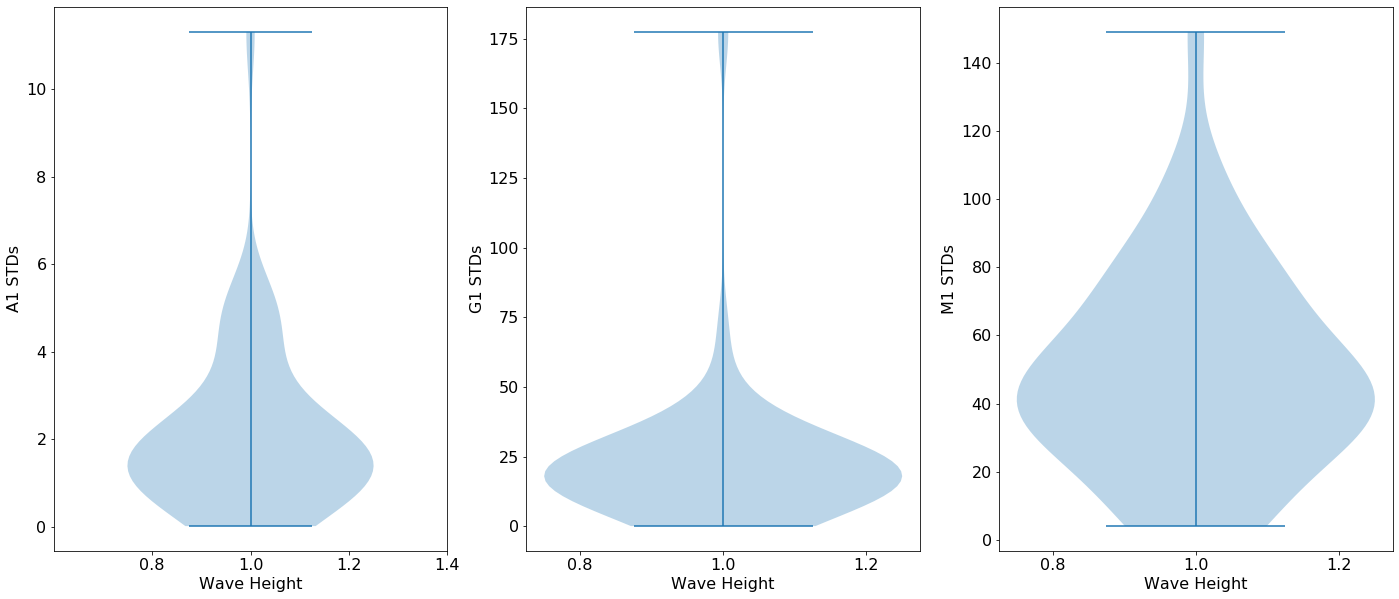

In [41]:
f = plt.figure(figsize=(24,10))
plt.rcParams.update({'font.size': 16})
#plt.title("A1, G1, M1 STDs vs. Significant Wave Height")
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)


ax1.violinplot(y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 STDs")
ax1.set_xticks(np.arange(0.8, 1.6, 0.2))
ax1.set_xlim(0.6, 1.4)

ax2.violinplot(y4)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("G1 STDs")
ax2.set_xticks(np.arange(0.8, 1.4, 0.2))


ax3.violinplot(y7)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("M1 STDs")
ax3.set_xticks(np.arange(0.8, 1.4, 0.2))


plt.show()

## From this data (above), we don't really see a trend other than maybe that mid-wave heights (around 2.5-3ft) seem to have a higher standard deviation than wave heights on either end of the spectrum (smaller or larger wave heights).

In [42]:
# Let's try plotting the mean values for each: 
def compute_means(input_label): 
    old_time = '16:37'
    means_minute_intervals = []
    wave_height_minute_intervals = []
    new_mean = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_mean) != 0:
                mean = statistics.mean(new_mean)
                means_minute_intervals.append(mean)
                wave_height_minute_intervals.append(data_csv['Hs(ft)'][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_mean = []
            old_time = t
        else:
            new_mean.append(data_csv[input_label][i])
    
    return means_minute_intervals, wave_height_minute_intervals, minute_times

In [43]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_wave_heights, a1_minutes = compute_means("IMU A1")
a2_means, a2_wave_heights, a2_minutes = compute_means("IMU A2")
a3_means, a3_wave_heights, a3_minutes = compute_means("IMU A3")

In [44]:
# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
g1_means, g1_wave_heights, g1_minutes = compute_means("IMU G1")
g2_means, g2_wave_heights, g2_minutes = compute_means("IMU G2")
g3_means, g3_wave_heights, g3_minutes = compute_means("IMU G3")

In [45]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_means, m1_wave_heights, m1_minutes = compute_means("IMU M1")
m2_means, m2_wave_heights, m2_minutes = compute_means("IMU M2")
m3_means, m3_wave_heights, m3_minutes = compute_means("IMU M3")

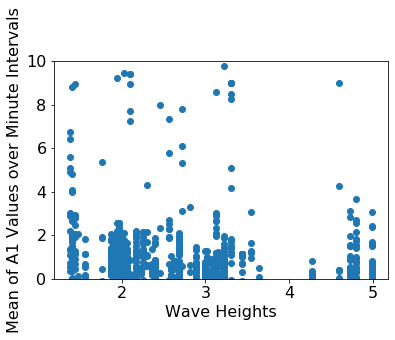

In [46]:
x = a1_wave_heights
y = a1_means
plt.xlabel('Wave Heights')
plt.ylabel('Mean of A1 Values over Minute Intervals')
axes = plt.gca()
axes.set_ylim([0,10])
plt.scatter(x, y)
plt.show()

## Plot A1, A2, A3, M1, M2, M3, G1, G2, G3 Mean vs. Wave Height

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:


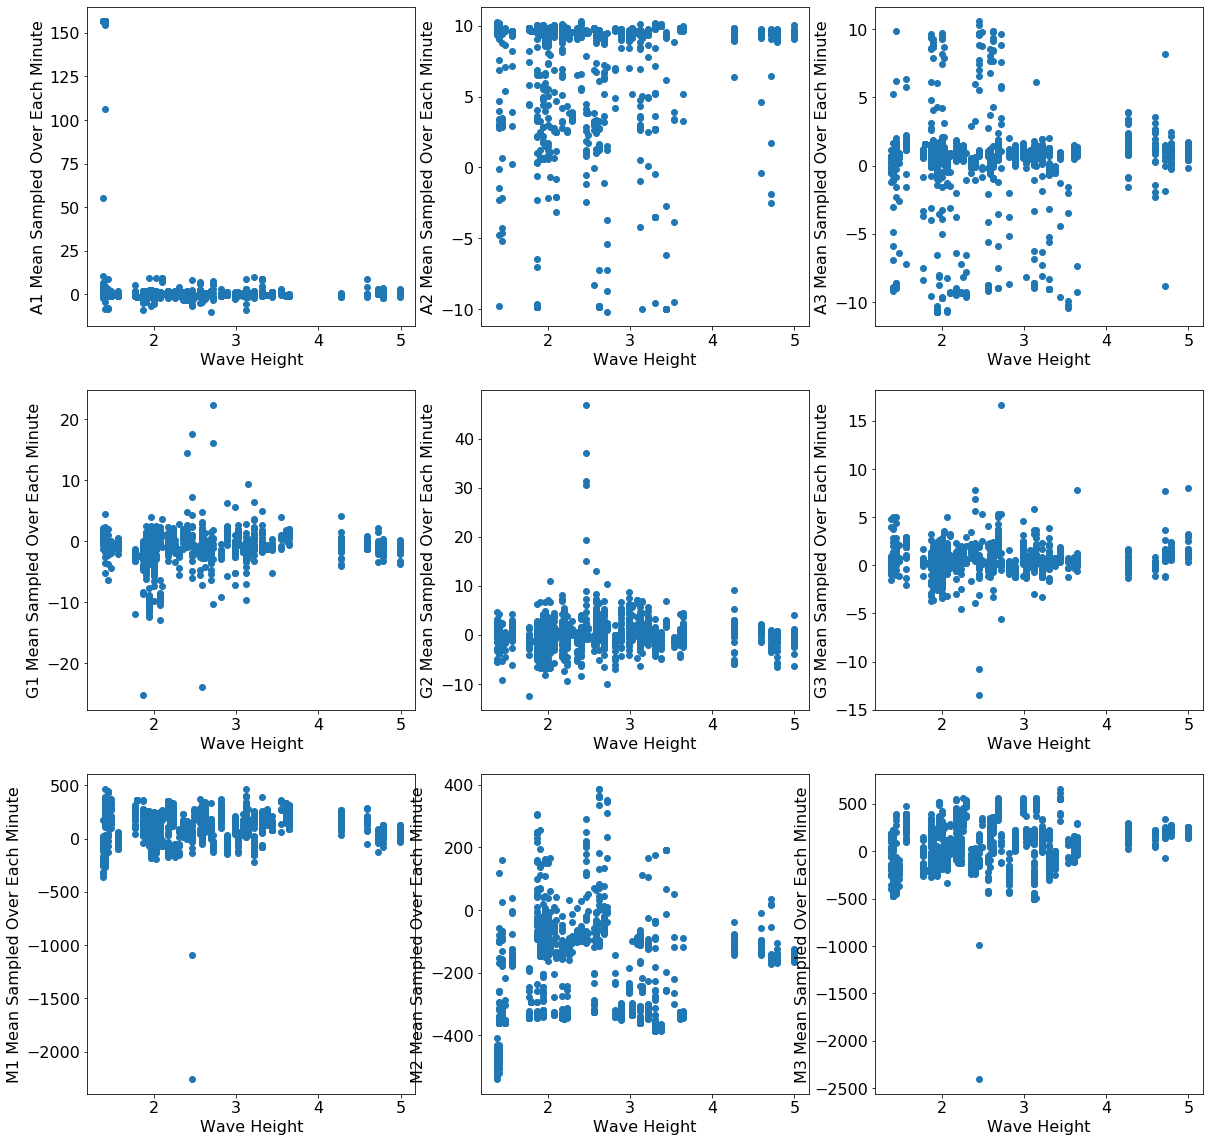

In [47]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_wave_heights, a1_means
x2, y2 = a2_wave_heights, a2_means
x3, y3 = a3_wave_heights, a3_means

x4, y4 = g1_wave_heights, g1_means
x5, y5 = g2_wave_heights, g2_means
x6, y6 = g3_wave_heights, g3_means

x7, y7 = m1_wave_heights, m1_means
x8, y8 = m2_wave_heights, m2_means
x9, y9 = m3_wave_heights, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

In [48]:
# Compress the data into a single point for each wave height:
def update_means(wave_heights, means):
    d = {}
    for hs, m in zip(wave_heights, means):
        if hs not in d: 
            d.update({hs : (m, 1)})
        else: 
            new_m = d[hs][0] + m
            new_len = d[hs][1] + 1
            d.update(hs = (new_m, new_len))
            
    # Compute the actual new mean for each value: 
    heights = []
    means = []
    for (key, (v1, v2)) in d.items(): 
        if key != 'hs':
            heights.append(key)
            means.append(float(v1/v2))
        
    return np.array(heights), np.array(means)

In [49]:
# Check to make sure values look correct
h1, m1 = update_means(a1_wave_heights, a1_means)
print(h1[:10])
print(m1[:10])

[3.15 2.99 3.44 3.54 3.31 3.38 3.12 2.07 1.94 2.72]
[-0.05352271  0.03822675 -1.55401206  1.62101212 -0.54517097 -0.57181652
  2.10689746  1.01017575 -0.7575882   6.09522199]


In [50]:
# Write a function to compute the line of best fit: 
from statistics import mean

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) / ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    
    return m, b

#m, b = best_fit_slope_and_intercept(xs,ys)

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:


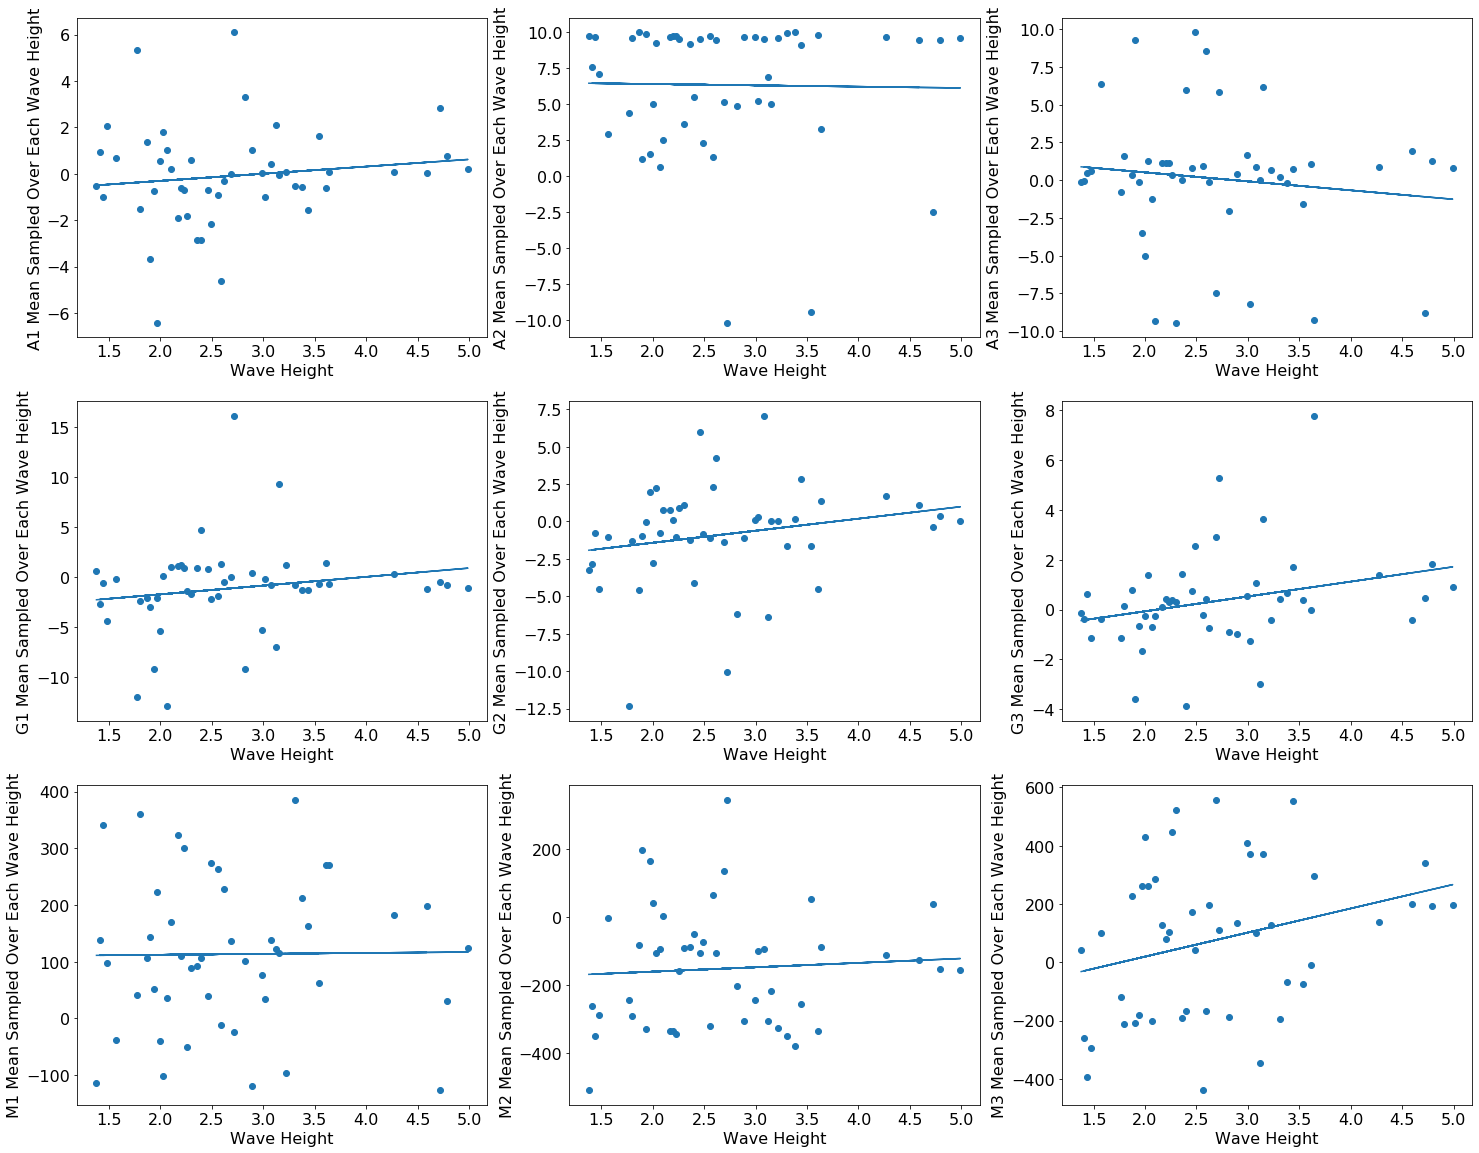

In [51]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Heights:")
plt.rcParams.update({'font.size': 16})

f = plt.figure(figsize=(25,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = update_means(a1_wave_heights, a1_means)
m1, b1 = best_fit_slope_and_intercept(x1, y1)
regression_line1 = [(m1*x)+b1 for x in x1]


x2, y2 = update_means(a2_wave_heights, a2_means)
m2, b2 = best_fit_slope_and_intercept(x2, y2)
regression_line2 = [(m2*x)+b2 for x in x2]

x3, y3 = update_means(a3_wave_heights, a3_means)
m3, b3 = best_fit_slope_and_intercept(x3, y3)
regression_line3 = [(m3*x)+b3 for x in x3]

x4, y4 = update_means(g1_wave_heights, g1_means)
m4, b4 = best_fit_slope_and_intercept(x4, y4)
regression_line4 = [(m4*x)+b4 for x in x4]

x5, y5 = update_means(g2_wave_heights, g2_means)
m5, b5 = best_fit_slope_and_intercept(x5, y5)
regression_line5 = [(m5*x)+b5 for x in x5]

x6, y6 = update_means(g3_wave_heights, g3_means)
m6, b6 = best_fit_slope_and_intercept(x6, y6)
regression_line6 = [(m6*x)+b6 for x in x6]

x7, y7 = update_means(m1_wave_heights, m1_means)
m7, b7 = best_fit_slope_and_intercept(x7, y7)
regression_line7 = [(m7*x)+b7 for x in x7]

x8, y8 = update_means(m2_wave_heights, m2_means)
m8, b8 = best_fit_slope_and_intercept(x8, y8)
regression_line8 = [(m8*x)+b8 for x in x8]

x9, y9 = update_means(m3_wave_heights, m3_means)
m9, b9 = best_fit_slope_and_intercept(x9, y9)
regression_line9 = [(m9*x)+b9 for x in x9]

ax1.scatter(x1,y1)
ax1.plot(x1, regression_line1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Mean Sampled Over Each Wave Height")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.plot(x2, regression_line2)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("A2 Mean Sampled Over Each Wave Height")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.plot(x3, regression_line3)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("A3 Mean Sampled Over Each Wave Height")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.plot(x4, regression_line4)
ax4.set_xlabel("Wave Height")
ax4.set_ylabel("G1 Mean Sampled Over Each Wave Height")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.plot(x5, regression_line5)
ax5.set_xlabel("Wave Height")
ax5.set_ylabel("G2 Mean Sampled Over Each Wave Height")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.plot(x6, regression_line6)
ax6.set_xlabel("Wave Height")
ax6.set_ylabel("G3 Mean Sampled Over Each Wave Height")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.plot(x7, regression_line7)
ax7.set_xlabel("Wave Height")
ax7.set_ylabel("M1 Mean Sampled Over Each Wave Height")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.plot(x8, regression_line8)
ax8.set_xlabel("Wave Height")
ax8.set_ylabel("M2 Mean Sampled Over Each Wave Height")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.plot(x9, regression_line9)
ax9.set_xlabel("Wave Height")
ax9.set_ylabel("M3 Mean Sampled Over Each Wave Height")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

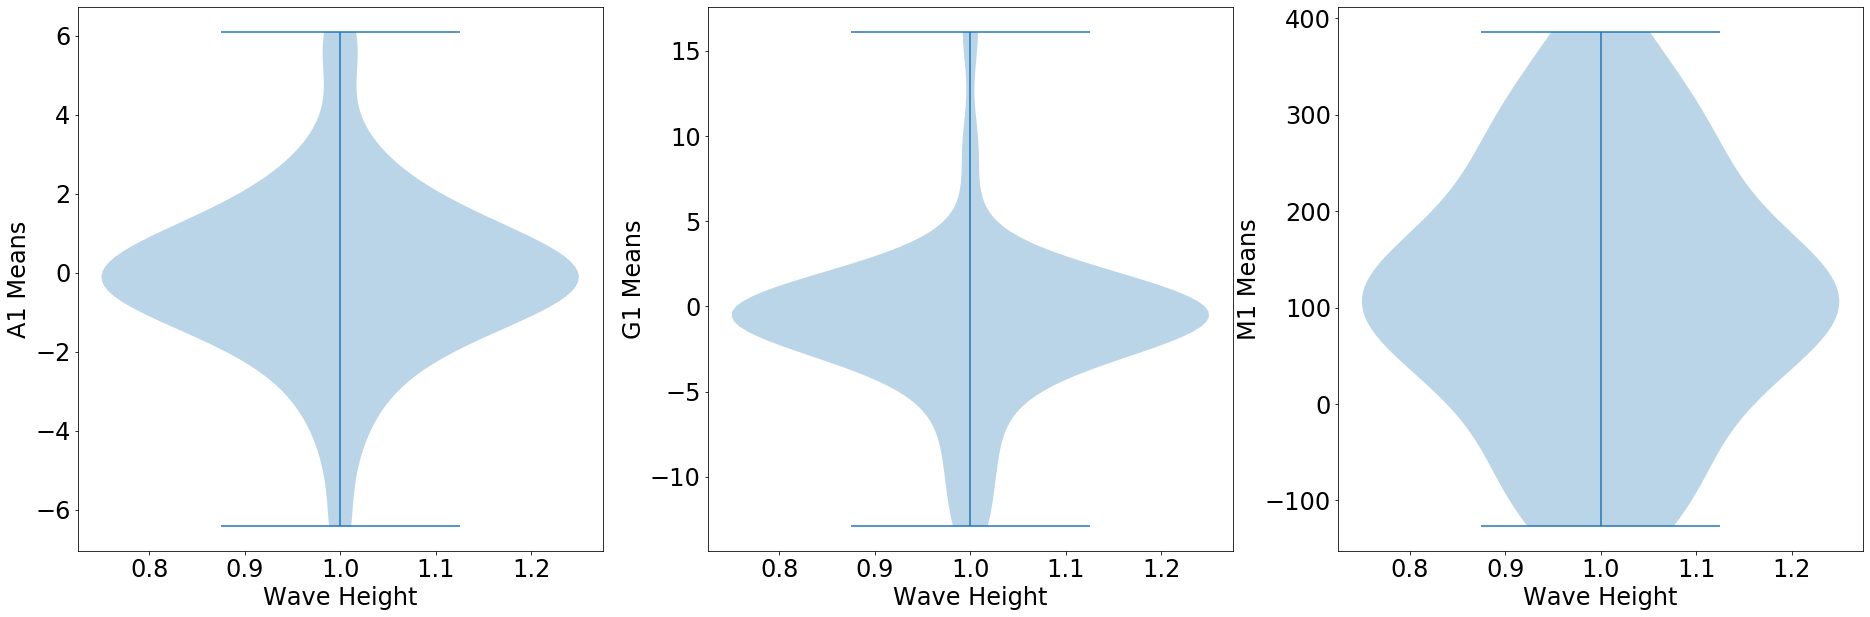

In [52]:
# Create a violin plot 
f = plt.figure(figsize=(32,10))
plt.rcParams.update({'font.size': 24})
#plt.title("A1, G1, M1 Means vs. Significant Wave Height", loc='center')


ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)


ax1.violinplot(y1)
ax1.set_xlabel("Wave Height")
ax1.set_ylabel("A1 Means")

ax2.violinplot(y4)
ax2.set_xlabel("Wave Height")
ax2.set_ylabel("G1 Means")

ax3.violinplot(y7)
ax3.set_xlabel("Wave Height")
ax3.set_ylabel("M1 Means")

plt.show()

In [53]:
### We would expect to see a positive correlation between wave height and A2 mean acceleration (which we may see more clearly if we compress the data into a lower sampling rate). A2 would theoretically represent the surfboard's 

In [54]:
# How to better visualize this data? Box/whisker plots? 

In [55]:
# Graph how each parameter changes over the course of a single surf session (i.e. plot IMU A1, A2, A3, ...)

In [56]:
# Compute the standard deviation over each minute: 
def compute_stds(input_label, output): 
    old_time = '16:37'
    stds_minute_intervals = []
    output_minute_intervals = []
    new_std = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_std) > 2:
                std = statistics.stdev(new_std)
                stds_minute_intervals.append(std)
                output_minute_intervals.append(data_csv[output][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_std = []
            old_time = t
        else:
            new_std.append(data_csv[input_label][i])
    
    return stds_minute_intervals, output_minute_intervals, minute_times

In [57]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_stds, a1_periods, a1_minutes = compute_stds("IMU A1", "Tp(s)")
a2_stds, a2_periods, a2_minutes = compute_stds("IMU A2", "Tp(s)")
a3_stds, a3_periods, a3_minutes = compute_stds("IMU A3", "Tp(s)")

In [58]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
g1_stds, g1_periods, g1_minutes = compute_stds("IMU G1", "Tp(s)")
g2_stds, g2_periods, g2_minutes = compute_stds("IMU G2", "Tp(s)")
g3_stds, g3_periods, g3_minutes = compute_stds("IMU G3", "Tp(s)")

In [59]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
m1_stds, m1_periods, m1_minutes = compute_stds("IMU M1", "Tp(s)")
m2_stds, m2_periods, m2_minutes = compute_stds("IMU M2", "Tp(s)")
m3_stds, m3_periods, m3_minutes = compute_stds("IMU M3", "Tp(s)")

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:


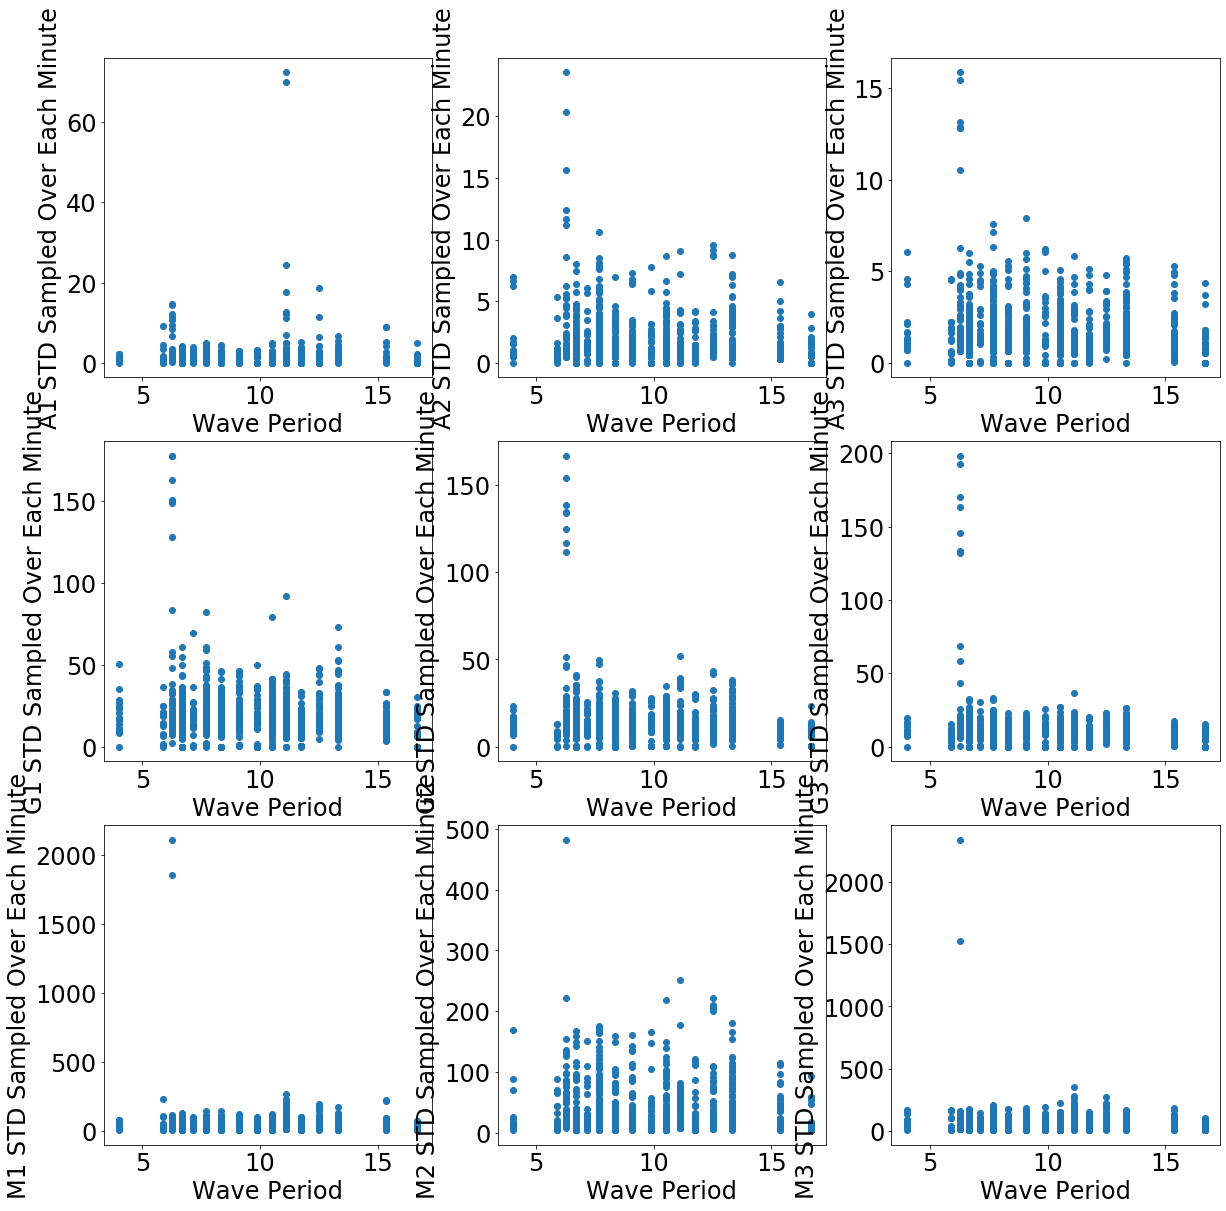

In [60]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_periods, a1_stds
x2, y2 = a2_periods, a2_stds
x3, y3 = a3_periods, a3_stds

x4, y4 = g1_periods, g1_stds
x5, y5 = g2_periods, g2_stds
x6, y6 = g3_periods, g3_stds

x7, y7 = m1_periods, m1_stds
x8, y8 = m2_periods, m2_stds
x9, y9 = m3_periods, m3_stds

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Period")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Period")
ax2.set_ylabel("A2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Period")
ax3.set_ylabel("A3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Period")
ax4.set_ylabel("G1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Period")
ax5.set_ylabel("G2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Period")
ax6.set_ylabel("G3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Period")
ax7.set_ylabel("M1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Period")
ax8.set_ylabel("M2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Period")
ax9.set_ylabel("M3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:


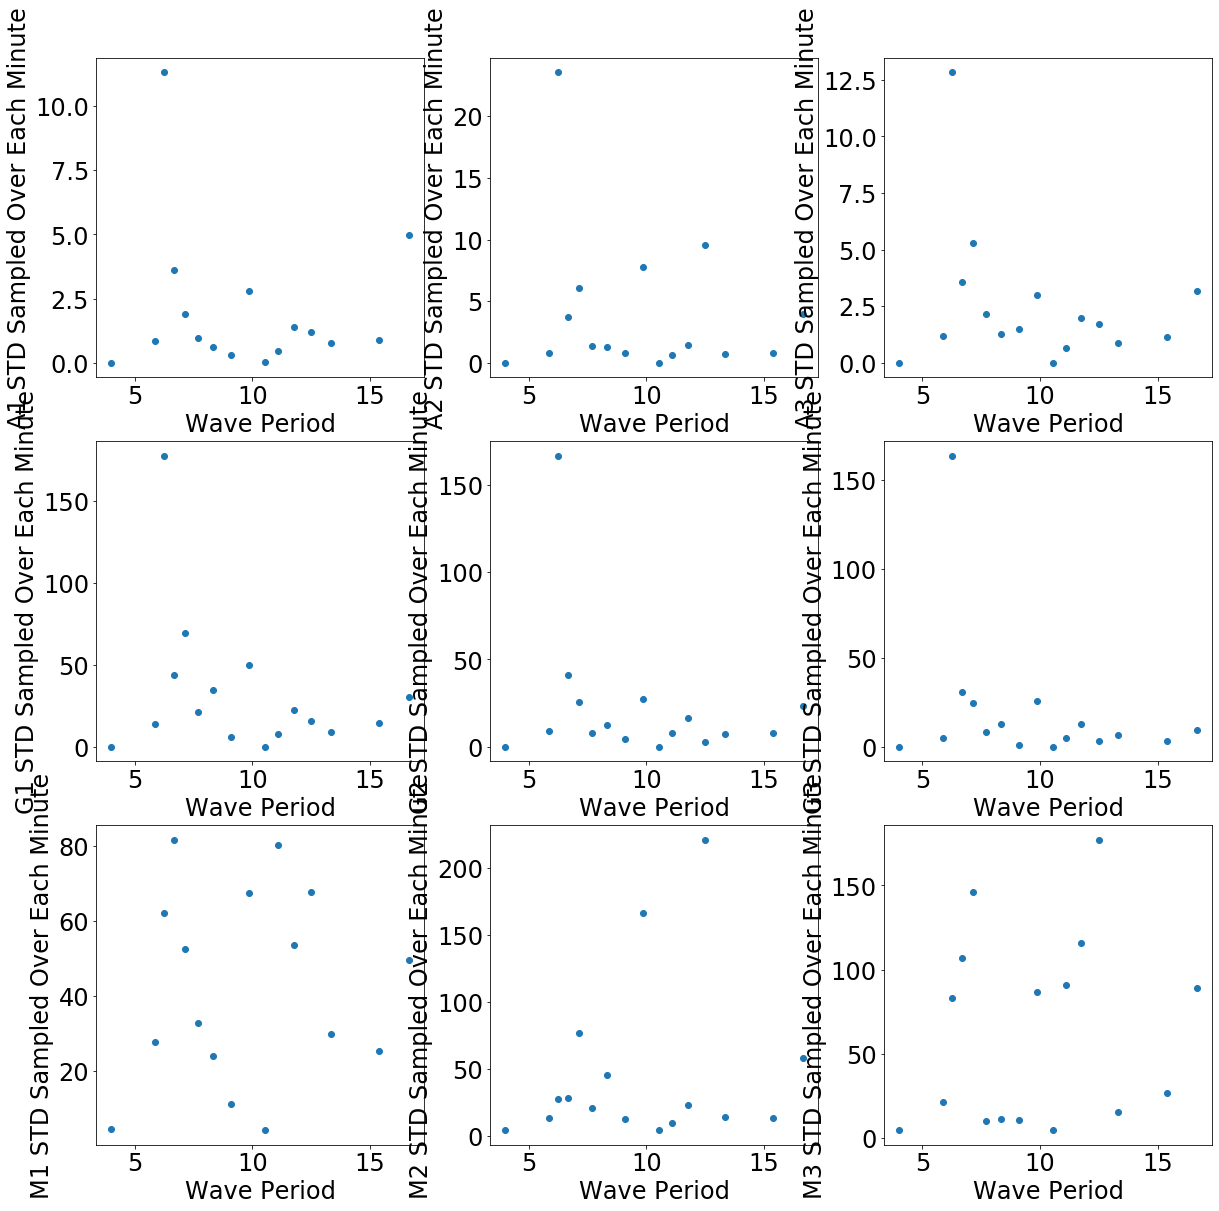

In [61]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 STDs vs. Wave Periods:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = update_stds(a1_periods, a1_stds)
m1, b1 = best_fit_slope_and_intercept(x1, y1)
regression_line1 = [(m1*x)+b1 for x in x1]


x2, y2 = update_stds(a2_periods, a2_stds)
m2, b2 = best_fit_slope_and_intercept(x2, y2)
regression_line2 = [(m2*x)+b2 for x in x2]

x3, y3 = update_stds(a3_periods, a3_stds)
m3, b3 = best_fit_slope_and_intercept(x3, y3)
regression_line3 = [(m3*x)+b3 for x in x3]

x4, y4 = update_stds(g1_periods, g1_stds)
m4, b4 = best_fit_slope_and_intercept(x4, y4)
regression_line4 = [(m4*x)+b4 for x in x4]

x5, y5 = update_stds(g2_periods, g2_stds)
m5, b5 = best_fit_slope_and_intercept(x5, y5)
regression_line5 = [(m5*x)+b5 for x in x5]

x6, y6 = update_stds(g3_periods, g3_stds)
m6, b6 = best_fit_slope_and_intercept(x6, y6)
regression_line6 = [(m6*x)+b6 for x in x6]

x7, y7 = update_stds(m1_periods, m1_stds)
m7, b7 = best_fit_slope_and_intercept(x7, y7)
regression_line7 = [(m7*x)+b7 for x in x7]

x8, y8 = update_stds(m2_periods, m2_stds)
m8, b8 = best_fit_slope_and_intercept(x8, y8)
regression_line8 = [(m8*x)+b8 for x in x8]

x9, y9 = update_stds(m3_periods, m3_stds)
m9, b9 = best_fit_slope_and_intercept(x9, y9)
regression_line9 = [(m9*x)+b9 for x in x9]

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Period")
ax1.set_ylabel("A1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Period")
ax2.set_ylabel("A2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Period")
ax3.set_ylabel("A3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Period")
ax4.set_ylabel("G1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Period")
ax5.set_ylabel("G2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Period")
ax6.set_ylabel("G3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Period")
ax7.set_ylabel("M1 STD Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Period")
ax8.set_ylabel("M2 STD Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Period")
ax9.set_ylabel("M3 STD Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

# Inputs vs. Wave Periods: 

In [62]:
# Let's try plotting the mean values for each: 
def compute_means(input_label, output): 
    old_time = '16:37'
    means_minute_intervals = []
    wave_height_minute_intervals = []
    new_mean = []
    minute_times = []
    for i in range(0, len(data_csv['Time'])):
        t = data_csv['Time'][i]
        if t != old_time: 
            #take the standard deviation and append it to stds
            if len(new_mean) != 0:
                mean = statistics.mean(new_mean)
                means_minute_intervals.append(mean)
                wave_height_minute_intervals.append(data_csv[output][i-1])
                minute_times.append(data_csv['Time'][i-1])
                #reset new_std to be a new list
                new_mean = []
            old_time = t
        else:
            new_mean.append(data_csv[input_label][i])
    
    return means_minute_intervals, wave_height_minute_intervals, minute_times

In [63]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_periods, a1_minutes = compute_means("IMU A1", "Tp(s)")
a2_means, a2_periods, a2_minutes = compute_means("IMU A2", "Tp(s)")
a3_means, a3_periods, a3_minutes = compute_means("IMU A3", "Tp(s)")

In [64]:
# Compute the standard deviation of  G1, G2, G3 columns over minute intervals for significant wave height. 
g1_means, g1_periods, g1_minutes = compute_means("IMU G1", "Tp(s)")
g2_means, g2_periods, g2_minutes = compute_means("IMU G2", "Tp(s)")
g3_means, g3_periods, g3_minutes = compute_means("IMU G3", "Tp(s)")

In [65]:
# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
m1_means, m1_periods, m1_minutes = compute_means("IMU M1", "Tp(s)")
m2_means, m2_periods, m2_minutes = compute_means("IMU M2", "Tp(s)")
m3_means, m3_periods, m3_minutes = compute_means("IMU M3", "Tp(s)")

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Periods:


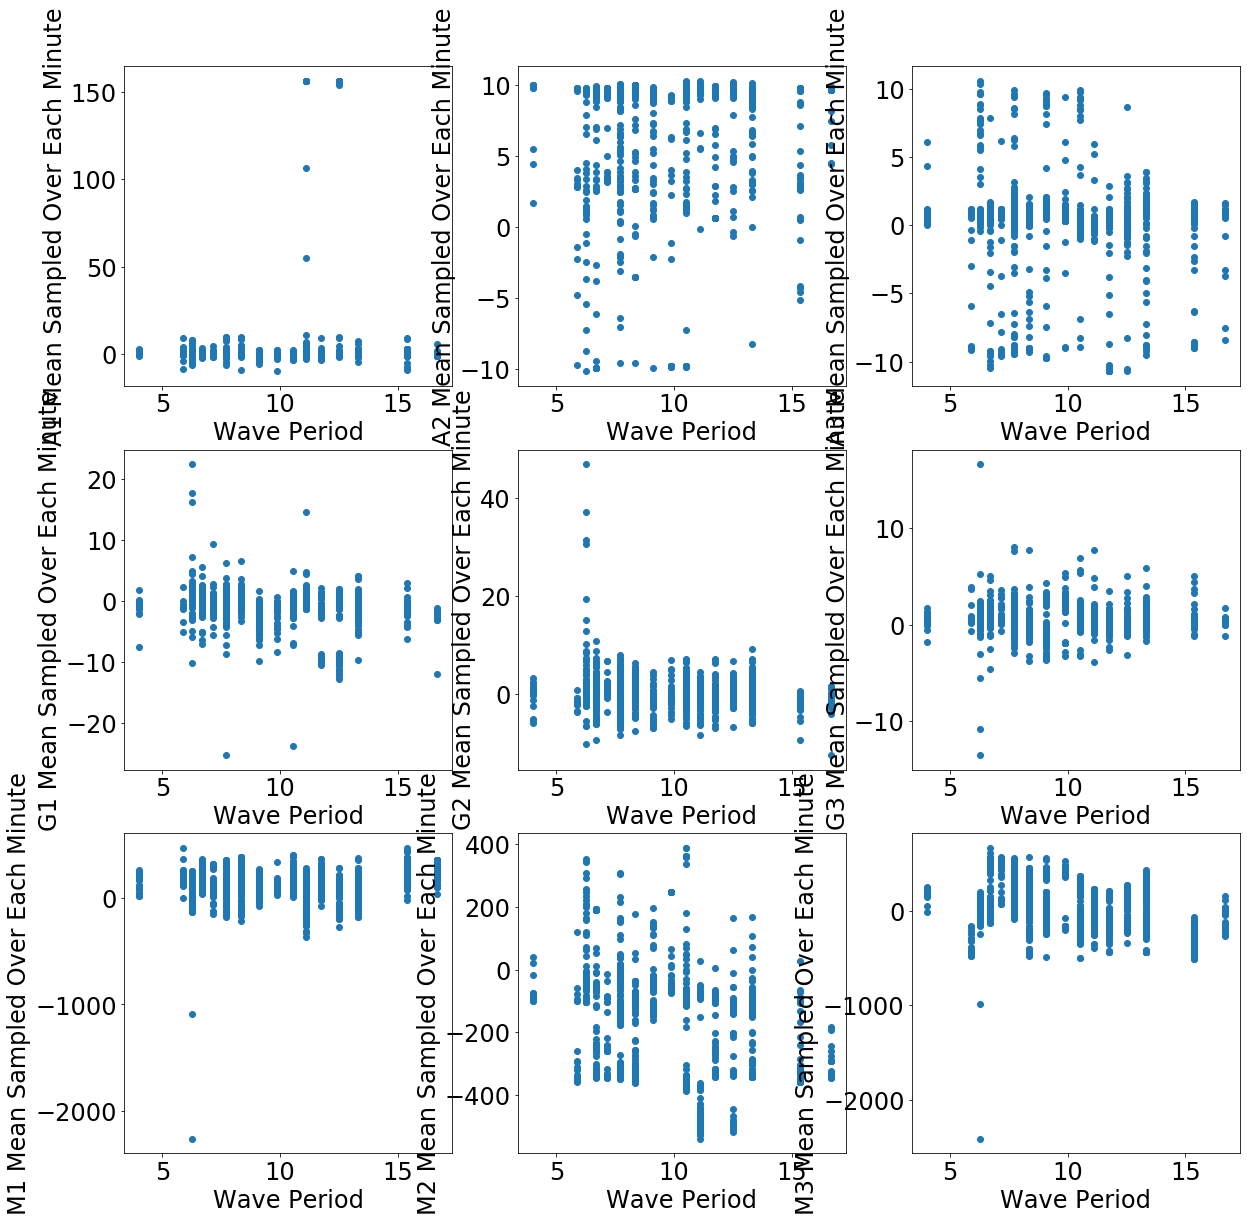

In [66]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Periods:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_periods, a1_means
x2, y2 = a2_periods, a2_means
x3, y3 = a3_periods, a3_means

x4, y4 = g1_periods, g1_means
x5, y5 = g2_periods, g2_means
x6, y6 = g3_periods, g3_means

x7, y7 = m1_periods, m1_means
x8, y8 = m2_periods, m2_means
x9, y9 = m3_periods, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Period")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Period")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Period")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Period")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Period")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Period")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Period")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Period")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Period")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

### Above we maybe see a negative correlation between M2 Mean sampled over each minute and wave period. 

# Inputs vs. Wave directions: 

In [67]:
# Compute the standard deviation of A1, A2, A3 columns over minute intervals for significant wave height. 
a1_means, a1_directions, a1_minutes = compute_means("IMU A1", "Dp(deg)")
a2_means, a2_directions, a2_minutes = compute_means("IMU A2", "Dp(deg)")
a3_means, a3_directions, a3_minutes = compute_means("IMU A3", "Dp(deg)")

# Compute the standard deviation of G1, G2, G3 columns over minute intervals for significant wave height. 
a1_means, a1_directions, a1_minutes = compute_means("IMU G1", "Dp(deg)")
a2_means, a2_directions, a2_minutes = compute_means("IMU G2", "Dp(deg)")
a3_means, a3_directions, a3_minutes = compute_means("IMU G3", "Dp(deg)")

# Compute the standard deviation of M1, M2, M3 columns over minute intervals for significant wave height. 
a1_means, a1_directions, a1_minutes = compute_means("IMU M1", "Dp(deg)")
a2_means, a2_directions, a2_minutes = compute_means("IMU M2", "Dp(deg)")
a3_means, a3_directions, a3_minutes = compute_means("IMU M3", "Dp(deg)")

Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Directions:


NameError: name 'g1_directions' is not defined

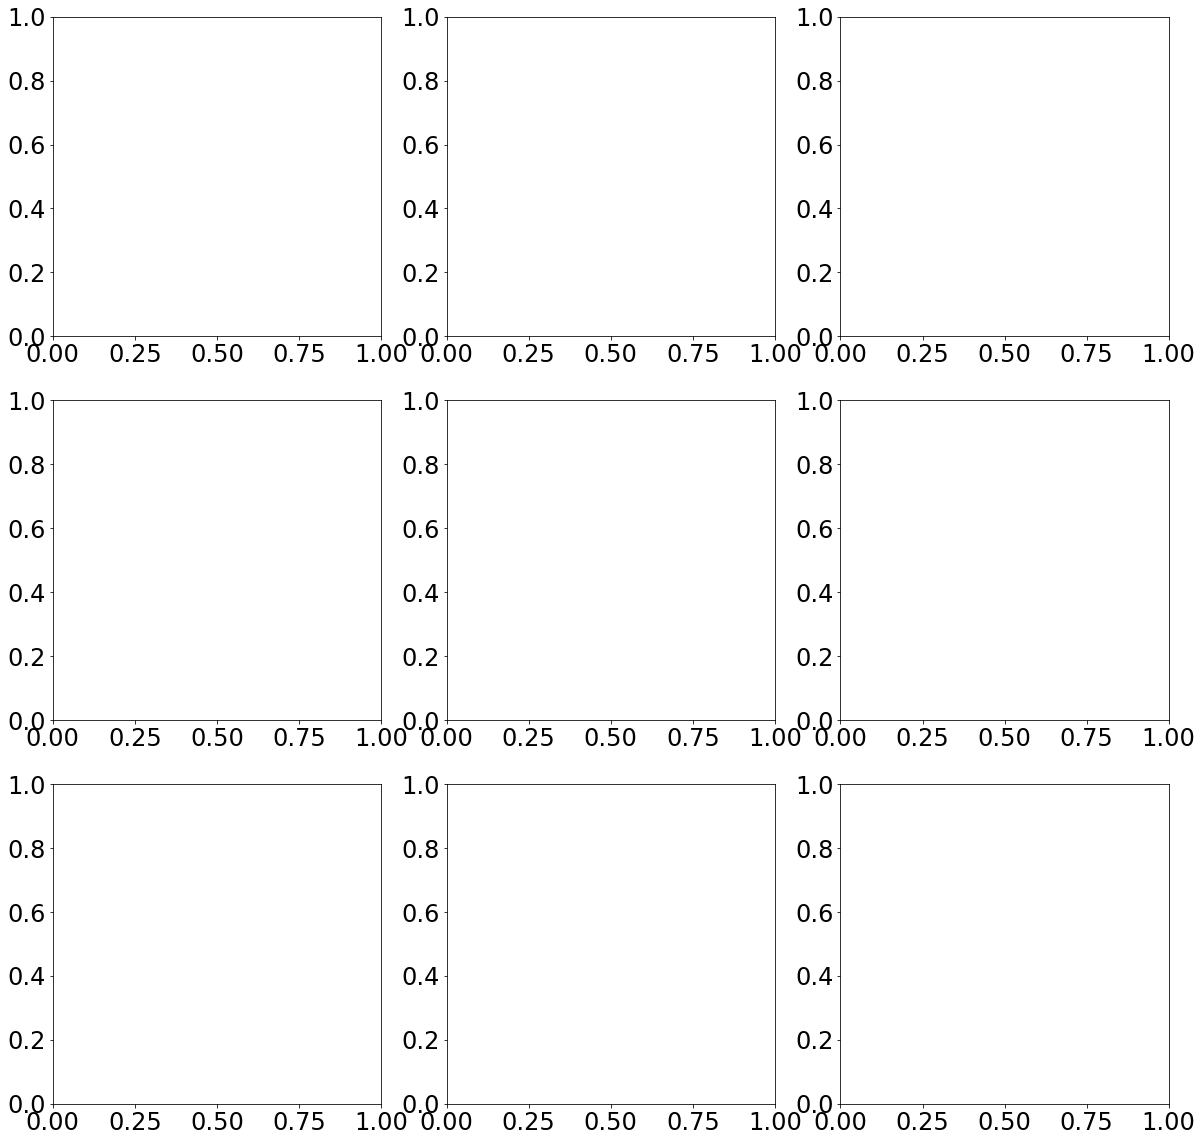

In [68]:
print("Plotting A1, A2, A3, G1, G2, G3, M1, M2, M3 Means vs. Wave Directions:")
f = plt.figure(figsize=(20,20))
ax1 = f.add_subplot(331)
ax2 = f.add_subplot(332)
ax3 = f.add_subplot(333)
ax4 = f.add_subplot(334)
ax5 = f.add_subplot(335)
ax6 = f.add_subplot(336)
ax7 = f.add_subplot(337)
ax8 = f.add_subplot(338)
ax9 = f.add_subplot(339)


x1, y1 = a1_directions, a1_means
x2, y2 = a2_directions, a2_means
x3, y3 = a3_directions, a3_means

x4, y4 = g1_directions, g1_means
x5, y5 = g2_directions, g2_means
x6, y6 = g3_directions, g3_means

x7, y7 = m1_directions, m1_means
x8, y8 = m2_directions, m2_means
x9, y9 = m3_directions, m3_means

ax1.scatter(x1,y1)
ax1.set_xlabel("Wave Direction")
ax1.set_ylabel("A1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax2.scatter(x2,y2)
ax2.set_xlabel("Wave Direction")
ax2.set_ylabel("A2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax3.scatter(x3,y3)
ax3.set_xlabel("Wave Direction")
ax3.set_ylabel("A3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax4.scatter(x4,y4)
ax4.set_xlabel("Wave Direction")
ax4.set_ylabel("G1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax5.scatter(x5,y5)
ax5.set_xlabel("Wave Direction")
ax5.set_ylabel("G2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax6.scatter(x6,y6)
ax6.set_xlabel("Wave Direction")
ax6.set_ylabel("G3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

ax7.scatter(x7, y7)
ax7.set_xlabel("Wave Direction")
ax7.set_ylabel("M1 Mean Sampled Over Each Minute")
#ax1.set_yticks(range(-2500, 1000, 500))
ax8.scatter(x8,y8)
ax8.set_xlabel("Wave Direction")
ax8.set_ylabel("M2 Mean Sampled Over Each Minute")
#ax2.set_yticks(range(-2500, 1000, 500))
ax9.scatter(x9,y9)
ax9.set_xlabel("Wave Direction")
ax9.set_ylabel("M3 Mean Sampled Over Each Minute")
#ax3.set_yticks(range(-2500, 1000, 500))

plt.show()

### Above we maybe see a negative correlation between M2 Mean sampled over each minute and wave direction, as well as a positive correlation between M3 Mean sampled over each minute and wave direction. 

In [ ]:
## We can also look at different levels of compression of the data (Ra)